In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Custom Loss Functions

In [2]:
# creating huber loss funciton

def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error)/2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error,squared_loss,linear_loss)

In [3]:
# load dataset for linear problem
from sklearn.datasets import load_boston

data = load_boston()
X, y = data.data, data.target

In [8]:
y = y.reshape(-1,1)

In [11]:
# simple model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation = tf.keras.activations.elu, kernel_initializer = tf.keras.initializers.he_uniform),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

model.compile( loss = huber_fn,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['mae'])

history = model.fit(X,y, epochs = 20)

Epoch 1/20
16/16 [==============================] - 4s 8ms/step - loss: 63.4990 - mae: 63.9990
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 33.5435 - mae: 34.0399
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 25.3280 - mae: 25.8238
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 21.3773 - mae: 21.8760
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 18.0539 - mae: 18.5499
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 15.1989 - mae: 15.6933
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 13.0140 - mae: 13.5096
Epoch 8/20
16/16 [==============================] - 0s 4ms/step - loss: 11.3073 - mae: 11.7960
Epoch 9/20
16/16 [==============================] - 0s 4ms/step - loss: 10.0219 - mae: 10.5096
Epoch 10/20
16/16 [==============================] - 0s 4ms/step - loss: 9.1060 - mae: 9.5911
Epoch 11/20
16/16 [==============================] 

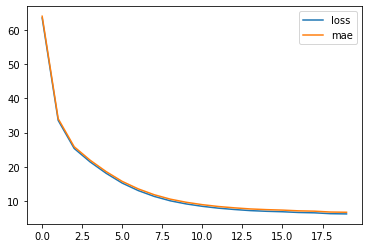

In [13]:
pd.DataFrame(history.history).plot()

In [14]:
# create a subclass of keras as loss function

In [15]:
class huberloss2(tf.keras.losses.Loss):
    def __init__(self, threshold = 1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) /2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 /2
        return tf.where(is_small_error,squared_loss,linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config,"threshold":self.threshold}